In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values
import seaborn as sns;

In [3]:
df_1 = pd.read_csv('chipVariantCalling_run1.tsv', sep = '\t')
df_2 = pd.read_csv('chipVariantCalling_run2.tsv', sep = '\t', low_memory=False)

In [4]:
known1 = df_1[df_1['chipOrControl'].isin(['CHIP', 'Control'])]
df1 = known1.drop_duplicates()
df1 = df1.rename(columns={"d.barcode": "barcode"})

known2 = df_2[df_2['chipOrControl'].isin(['CHIP', 'Control'])]
df2 = known2.drop_duplicates()
df2 = df2.rename(columns={"d.barcode": "barcode"})

In [5]:
df1

,barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,7281,26,0.0036,0.0033,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.0,1.182210,CHIP
4,4010289633,7282,29,0.0040,0.0036,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.7,1.061729,CHIP
8,4010289633,7282,24,0.0033,0.0033,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,3626:3607,12:12,34.9,1.005270,CHIP
12,4010289633,178,2,0.0112,0.0120,MODERATE,NRAS,chr1:115256571_T/C,Baseline,Male,MS2083,2:2,88:88,1:1,37.0,1.000000,CHIP
13,4010289633,1773,6,0.0034,0.0035,MODERATE,NRAS,chr1:115258674_T/C,Baseline,Male,MS2083,2:2,889:874,3:3,37.0,1.017150,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536725,4010289816,711,2,0.0028,0.0028,MODERATE,BRCC3,chrX:154305513_C/T,Y3,Female,MS6625,2:2,356:353,1:1,31.0,1.008490,Control
536726,4010289816,711,2,0.0028,0.0029,MODERATE,BRCC3,chrX:154305518_T/C,Y3,Female,MS6625,2:2,355:353,1:1,37.0,1.005660,Control
536733,4010289816,711,2,0.0028,0.0029,HIGH,BRCC3,chrX:154305518_T/C,Y3,Female,MS6625,2:2,355:353,1:1,37.0,1.005660,Control
536734,4010289816,711,2,0.0028,0.0029,MODERATE,BRCC3,chrX:154305533_A/T,Y3,Female,MS6625,2:2,356:353,1:1,37.0,1.008490,Control


In [6]:
#Making binary
df1['gender']=df1.gender.astype(object)
df1['chipOrControl']=df1.chipOrControl.astype(object)
df1['sampleTimePt']=df1.sampleTimePt.astype(object)

df1 = df1.replace({'gender': {'Male': 1, 'Female': 0}})

df1 = df1.replace({'sampleTimePt': {'Baseline': 1, 'Y3': 0}})

df1 = df1.replace({'chipOrControl': {'CHIP': 1, 'Control': 0}})

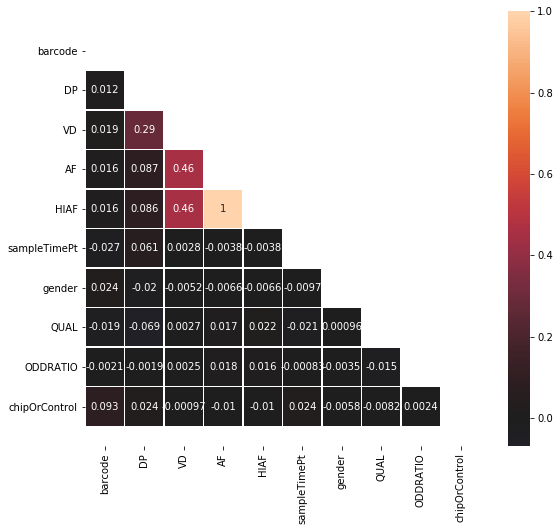

In [7]:
corrs = df1.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

In [9]:
dfg = df1[['chipOrControl', 'SYMBOL', 'AF', 'ODDRATIO', 'VD']]
dfg.count()

chipOrControl    121936
SYMBOL           121936
AF               121936
ODDRATIO         121936
VD               121936
dtype: int64

In [10]:
df_chip = dfg[dfg["AF"] >= 0.02]
df_con = dfg[dfg["AF"] < 0.02]
df_chip.head()

,chipOrControl,SYMBOL,AF,ODDRATIO,VD
276,1,DNMT3A,0.0250,1.164410,2
716,1,TET2,0.5030,1.007435,2113
1332,1,TET2,1.0000,0.000000,2
1444,1,TET2,0.0600,2.057400,3
1452,1,TET2,0.0392,1.040843,2


In [12]:
g_con = dfg_con['SYMBOL'].unique()
g_chip = df_chip['SYMBOL'].unique()
print(len(g_con))
print(len(g_chip))

34
36


In [13]:
set(g_chip)-set(g_con)

{'AC078842.3', 'LY9'}

In [14]:
print(df_con[df_con['SYMBOL'] == 'AC078842.3'].count())
print(df_con[df_con['SYMBOL'] == 'LY9'].count())

chipOrControl    15
SYMBOL           15
AF               15
ODDRATIO         15
VD               15
dtype: int64
chipOrControl    78
SYMBOL           78
AF               78
ODDRATIO         78
VD               78
dtype: int64


In [17]:
X = dfg.drop(['AF', 'SYMBOL'],axis=1) # drop Y from our dataframe
Y = dfg['AF'] # create a dataframe with just the Y values


In [18]:
rng = np.random.RandomState(1) # make sure the results are repeatable
# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.8) 
linear = LinearRegression() # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",round(training_score,4))
print("Testing score is",round(rsquared_linear,4))

Training score is 0.2436
Testing score is 0.1166


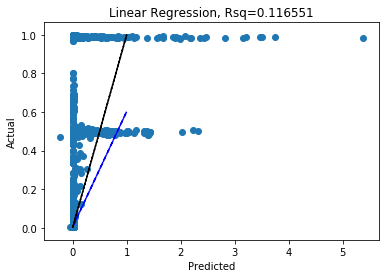

In [19]:
plt.scatter(preds_linear,Y_test) # scatter plot of predicted values against actual values
# use numpy polyfit and poly1d to create a function for the line of best fit, then plot this function in blue
p1 = np.poly1d(np.polyfit(preds_linear, Y_test, 1))
plt.plot(Y_test,p1(Y_test),'b--')
plt.title("Linear Regression, Rsq=%f" % rsquared_linear) # add a title including the correlation coefficient
plt.xlabel("Predicted") # xlabel
plt.ylabel("Actual") # ylabel
plt.plot(Y_test,Y_test,'k--') # add x=y line in black for comparison
plt.show() # display the final plot

In [60]:
df_chip.head()

,chipOrControl,SYMBOL,AF,ODDRATIO,VD
276,1,DNMT3A,0.0250,1.164410,2
716,1,TET2,0.5030,1.007435,2113
1332,1,TET2,1.0000,0.000000,2
1444,1,TET2,0.0600,2.057400,3
1452,1,TET2,0.0392,1.040843,2


In [61]:
# This percentage is how many of the ones which, by definition should be classified as CHIP but were classified as control.
control = df_chip[df_chip['chipOrControl'] == 0]
print(control.count()/df_chip.count())

chipOrControl    0.464256
SYMBOL           0.464256
AF               0.464256
ODDRATIO         0.464256
VD               0.464256
dtype: float64


In [54]:
X = df_chip.drop(['chipOrControl', 'SYMBOL'],axis=1) # drop Y from our dataframe
y = df_chip['chipOrControl'] # create a dataframe with just the Y values

X = -(X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8, random_state=1) 

from sklearn.linear_model import LogisticRegression # import the LogisticRegression model

logreg = LogisticRegression(solver='lbfgs',penalty='none')
logreg.fit(X_train,y_train) # fit the training data to the model
print('Model coefficients are',np.round(logreg.coef_,3)) # print the model coefficients c1,...,c4
print('Model intercept is',np.round(logreg.intercept_,3)) # print the model intercept c0

Model coefficients are [[ 0.037 -0.127 -0.016]]
Model intercept is [0.009]


In [55]:
 y_preda = logreg.predict_proba(X_test) # calculate the probabilities for the test features
# print out the probability table with a header
print('Probability table for testing set is:')
print(y_preda)

Probability table for testing set is:
[[0.50115408 0.49884592]
 [0.49401937 0.50598063]
 [0.49373196 0.50626804]
 ...
 [0.49393156 0.50606844]
 [0.49797261 0.50202739]
 [0.49374987 0.50625013]]


In [56]:
y_pred=logreg.predict(X_test)

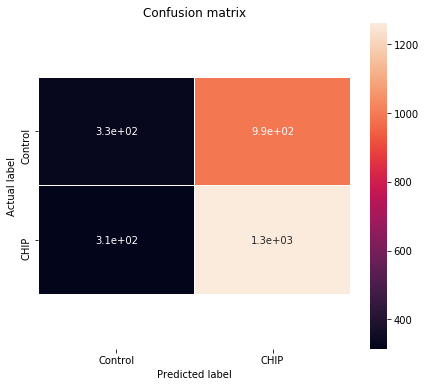

In [57]:
 from sklearn.metrics import confusion_matrix # import the confusion matrix function
cnf_matrix = confusion_matrix(y_test, y_pred) # create a confusion matrix for our actual and predicted values
# create a data frame from the confusion matrix with the column and row names being the class_names
class_names=['Control', 'CHIP'] # names of the binary classes for plotting
cmatrix = pd.DataFrame(cnf_matrix,columns=class_names,index=class_names) 
f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
plt.title('Confusion matrix') # add a title
plt.ylabel('Actual label') # add a ylabel
plt.xlabel('Predicted label') # add a xlabel
# adjust the bottom and top of the figure, so we can view all of it
bottom, top = ax.get_ylim()  # get the y axis limits
ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits